# Coursework 1

## Question 1.a
Partition the provided face data into your training and testing data, in a way you choose.
Explain briefly the way you partitioned. Apply PCA to your training data i.e. compute the
eigenvectors and eigenvalues of the covariance matrix $S=(1/N)AA^{T}$ directly. Show and discuss, including: the eigenvectors and eigenvalues, the mean image, how many
eigenvectors are with non-zero eigenvalues, and how many eigenvectors are to be used
for face recognition. Give physical meanings behind your answers.

### Loading Face Dataset

In [6]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_content = sio.loadmat( 'face(1).mat' )

mat_content

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

* __X__ contains the face data, where each column of __X__ is a one image from a total of 520 images.
* __l__ contains the label/face identity of each image

In [7]:
face_data = mat_content[ 'X' ]

print( face_data.shape )

(2576, 520)


Each image is a column that is 2576 values long.

In [8]:
face_157 = face_data[:,157]

print(face_157.shape)
print(face_157)

(2576,)
[ 55  55  54 ... 168 168 174]


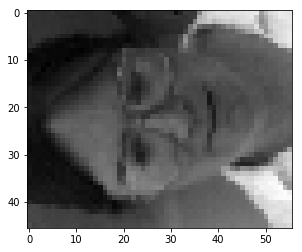

In [9]:
# face data is in 46x56 format

face_157 = np.reshape(face_157,(46,56))

plt.imshow(face_157, cmap = 'gist_gray')

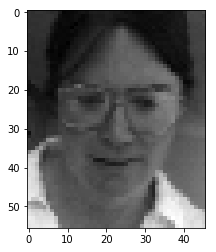

In [10]:
face_157 = face_157.T
plt.imshow(face_157,cmap = 'gist_gray')

In [11]:
face_labels = mat_content['l']
print(face_labels[0,157])

16


___
### Splitting into Training and Test Sets
If the number of values belonging to each class are unbalanced, stratified sampling is a good thing, since it keeps the class proportions in the training and test sets from the whole dataset.

For this dataset, we have 520 images, but 52 faces. Each identity has 10 images, so we have balanced classes. As such, a purely random shuffle should give a fair test and train split.

From [StackOverflow: Stratified Sampling Necessary?](https://datascience.stackexchange.com/questions/16265/is-stratified-sampling-necessary-random-forest-python)

In [12]:
print( face_data.shape )

(2576, 520)


#### Reshaping Data Set
Personally, I find it weird having each image in a column as opposed to a row. In my head, it makes much more sense of each image was in a row.

Tranpose the dataset, so we have __520__ rows, each one __2576__ long containing a face image.

In [13]:
face_data_row = face_data.T
print( face_data_row.shape )

(520, 2576)


In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split( face_data_row, test_size = 0.2, random_state = 42 )

In [15]:
print( 'Train Set: {}, Percentage: {} %'.format( train_set.shape, 100*train_set.shape[0] / face_data_row.shape[ 0 ] ) )
print( 'Test  Set: {}, Percentage: {} %'.format( test_set.shape, 100*test_set.shape[0] / face_data_row.shape[ 0 ]) )

Train Set: (416, 2576), Percentage: 80.0 %
Test  Set: (104, 2576), Percentage: 20.0 %


#### Dataset with labels
It might be a good idea to have the identity labels attached to the dataset

In [16]:
face_data_labels = mat_content[ 'l' ]

print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)


In [17]:
faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )

print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Labeled Shape: (2577, 520)


We now have a dataset __faceDataLabeled__ which contains the images with their identities in the bottom-most row.

In [18]:
rowLabel = faceDataLabeled[ 2576 ]

___
### Applying PCA 
We dont actually need class labels for PCA analysis, so we can use the **train_set** data set instead of the __faceDataLabeled__ data set.

#### Calculate d-dimensional mean vector
We have 2576 dimensions, need to calculate the mean for each dimension to get the mean face.

In [19]:
train_set[ : 1] # Access a row

print( train_set[ : , 1 ].shape ) # Access a column

(416,)


In [20]:
# Some dirty list comprehension below. Essentially iterate over the columns in the train_set and calculate
# mean for each column ( d means )
mean_face_row = np.array( [ [ np.mean( train_set[ : ,col ] ) for col in range( train_set.shape[ 1 ] ) ] ] ) 

print( 'Mean Vector: \n {}'.format( mean_face_row ) )

Mean Vector: 
 [[124.06971154 123.26682692 121.08413462 ...  85.33653846  83.44711538
   81.86298077]]


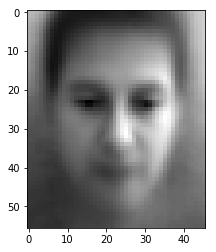

In [21]:
mean_face_img = np.reshape(mean_face_row,(46,56))

plt.imshow( mean_face_img.T, cmap = 'gist_gray')

#### Computing Covariance Matrix

In [106]:
cov_mat = np.cov( [ col for col in train_set.T ] )

print( 'Shape of cov_mat: {}'.format( cov_mat.shape ) )

Shape of cov_mat: (2576, 2576)


The covariance matrix contains the covariance between each pair of features, all 2576 of them, resulting in a $2576\times2576$ matrix. Along the main diagonal of the matrix, we have the variance of the feature.

The mean vector is often referred to as the centroid and the variance-covariance matrix as the dispersion or dispersion matrix. Also, the terms variance-covariance matrix and covariance matrix are used interchangeably. 

[Mean Vector and Covariance Matrix](https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm)

##### Why do we need the covariance matrix?

The following article is a __mustread__. It goes over the covariance matrix, and why calculating the eigenvectors is important.

[A geometric interpretation of the covariance matrix](http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/?fbclid=IwAR2HCYZtV9m7_miA3YeMD2Cpx5w9wT8UlO3ncGWiJN-FNHvx3Tvsz2bgUJc)

#### Computing Eigenvectors and corresponding eigenvalues

Eigenvectors and eigenvalues uniquely define the covariance matrix, and as such, the data set.

In [23]:
eig_val, eig_vec = np.linalg.eig( cov_mat )

In [24]:
eig_val.shape

(2576,)

We can interpret the covariance matrix as a linear operator that transforms white data into the data that is observed in the training set.

The covariance matrix defines both the spread and orientation of our data. We would like to represent the covariance matrix with a vector and its magnitude. What we want to do is find the vector that points into the direction of the largest spread of data, and whose magnitude equals the spread in that direction.

Define the vector $\textbf{v}$, and the dataset $\textbf{D}$. The projection of the data onto this vector is $\textbf{v}^T \textbf{D}$, and the variance is $\textbf{v}^T\sum \textbf{v}$

We want the vector that points in the direction of largest variance, so we choose components such that the covariance matrix of the projected data is as large as possible. This is achieved by setting $\textbf{v}$ equal to the largest eigenvector of the covariance matrix. The second largest eigenvector is always orthogonal to the largest eigenvector, and points into the direction of the second largest spread of data.

#### Sorting eigenvectors based on eigenvalues

In [25]:
eig_pairs = [ (np.abs( eig_val[ i ] ), eig_vec[ :, i ] ) for i in range( len( eig_val ) ) ]

eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in eig_pairs:
    print( i[ 0 ])

927253.6841063226
533813.8378604061
449959.47998223326
263874.7054866035
223942.4734027267
142059.10068695052
133012.7350023589
116332.77629895517
99478.55501971247
81207.79804071407
62483.505273194874
58698.96440793427
52337.071328873855
51218.497221054924
45745.37628656063
42273.46899059614
39672.505018570206
35423.48368828105
33807.733284158094
32806.5234780486
29535.33327749416
26433.381405067554
25743.795385880596
24553.29527162198
22854.450963161147
22305.22165897503
21003.577261056125
20035.867476395717
19145.23921088848
18629.475853845805
17997.25518583381
17198.039266302938
16997.833201324145
15861.86371966074
15548.10616256463
14341.336991784168
13953.478422614575
13843.36752975161
13194.075603726367
12771.547468981888
12426.518048051332
11707.667848472576
11391.573825798772
11139.390881573778
10885.840639905051
10549.773922907783
10092.122494709349
9875.183183397708
9649.106573224957
9465.733475121386
9027.942927203534
8848.458328396993
8641.361657973406
8357.733865169157
82

4.036498026281892e-12
4.028605713263248e-12
4.028605713263248e-12
4.022496847083449e-12
4.022496847083449e-12
4.010286090742132e-12
4.010286090742132e-12
4.00300366729778e-12
4.00300366729778e-12
3.99129368316024e-12
3.99129368316024e-12
3.983578597195953e-12
3.983578597195953e-12
3.983389149021243e-12
3.983389149021243e-12
3.976904793987178e-12
3.976904793987178e-12
3.97536732859884e-12
3.97536732859884e-12
3.975071044030339e-12
3.975071044030339e-12
3.963037219533857e-12
3.963037219533857e-12
3.9555178876521524e-12
3.9555178876521524e-12
3.951816188974118e-12
3.951816188974118e-12
3.945297711104372e-12
3.945297711104372e-12
3.943771641399424e-12
3.943771641399424e-12
3.94356557422107e-12
3.930079478984169e-12
3.930079478984169e-12
3.916990151655336e-12
3.916990151655336e-12
3.9138799672686626e-12
3.9138799672686626e-12
3.863027723363258e-12
3.863027723363258e-12
3.862877458522123e-12
3.862877458522123e-12
3.861302525279756e-12
3.861302525279756e-12
3.84512508357027e-12
3.845125083570

By quickly scrolling through the ordered eigenvalue eigenvector pairs, we can see that as we reach the bottom, we have eigenvalues which are very small (order of magnitude $10^{-11}$ and smaller). This suggests that these eigenvectors have the smallest spread of data. 

For the purpose of PCA, we want the eigenvectors with large eigenvalues, since they represent the data the most. The eigenvectors with smal eigenvalues close to 0 can be discarded.

In [26]:
k_eig_pairs = []

for i in eig_pairs:
    if( i[ 0 ] > 1 ):
        k_eig_pairs.append( i )

In [27]:
for i in k_eig_pairs:
    print( i[ 0 ] )

927253.6841063226
533813.8378604061
449959.47998223326
263874.7054866035
223942.4734027267
142059.10068695052
133012.7350023589
116332.77629895517
99478.55501971247
81207.79804071407
62483.505273194874
58698.96440793427
52337.071328873855
51218.497221054924
45745.37628656063
42273.46899059614
39672.505018570206
35423.48368828105
33807.733284158094
32806.5234780486
29535.33327749416
26433.381405067554
25743.795385880596
24553.29527162198
22854.450963161147
22305.22165897503
21003.577261056125
20035.867476395717
19145.23921088848
18629.475853845805
17997.25518583381
17198.039266302938
16997.833201324145
15861.86371966074
15548.10616256463
14341.336991784168
13953.478422614575
13843.36752975161
13194.075603726367
12771.547468981888
12426.518048051332
11707.667848472576
11391.573825798772
11139.390881573778
10885.840639905051
10549.773922907783
10092.122494709349
9875.183183397708
9649.106573224957
9465.733475121386
9027.942927203534
8848.458328396993
8641.361657973406
8357.733865169157
82

We can now represent the face images using this subset of the eigenvectors.

In [28]:
print( 'Original Eig_Pairs: {}'.format( len( eig_pairs ) ) )
print( 'Reduced Eig_Pairs: {}'.format( len( k_eig_pairs ) ) )

Original Eig_Pairs: 2576
Reduced Eig_Pairs: 415


We have reduced the dimensions from 2576 to 415 features. We can do face recognition by projecting training images onto this smaller subset and calculating the weights for each eigenvector.

[Eigenfaces for recognition](https://www.cs.ucsb.edu/~mturk/Papers/jcn.pdf)

Check if every element in the eigenvector is real: True


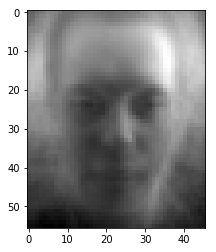

In [32]:
eigen_face_1 = k_eig_pairs[ 0 ][ 1 ]

print( 'Check if every element in the eigenvector is real: {}'.format( all( item for item in np.isreal( eigen_face_1 ) ) ) )

eigen_face_1_real = eigen_face_1.real

eigen_face_1_img = np.reshape(eigen_face_1_real,(46,56))

plt.imshow( eigen_face_1_img.T, cmap = 'gist_gray')

We now have 415 __eigenfaces__. Above is the eigenface of the eigenvector with the largest data spread.

___

## Question 1.b
Use the low-dimensional computation of eigenspace i.e. using $(1/N)A^{T} A$ of your training
data. Show and discuss, in comparison to a), including: if the eigenvectors and
eigenvalues obtained are identical, what are the pros/cons of each method. Show
respective measurements for your answers.

### Low dimension PCA

#### Figuring out what $\textbf{A}$ is
A is an $D\times N$ matrix. It is essentially the the vector containing the difference between the training image and the mean face.

In [108]:
mean_face_row = mean_face_row.reshape( 2576, )

# Go through the training set
# Subtract meanface from each image
# Construct A

A = train_set.astype( 'float64' )
A[ 0 ] - mean_face_row

array([ 130.93028846, -109.26682692,  -89.08413462, ...,  -38.33653846,
        -29.44711538,  -22.86298077])

In [109]:
for rowIndex in range( A.shape[ 0 ] ):
    A[ rowIndex ] = A[ rowIndex ] - mean_face_row

In [112]:
A.shape

(416, 2576)

In [114]:
A.T.shape

(2576, 416)

In [121]:
lowDimension = np.divide( np.dot( A , A.T ), A.shape[ 0 ] )

lowDimension.shape

(416, 416)

In [124]:
lowDimEigVal, lowDimEigVec = np.linalg.eig( lowDimension )

In [126]:
lowDimEigVal.shape

(416,)

In [127]:
lowDim_eig_pairs = [ (np.abs( lowDimEigVal[ i ] ), lowDimEigVec[ :, i ] ) for i in range( len( lowDimEigVal ) ) ]

lowDim_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in lowDim_eig_pairs:
    print( i[ 0 ])

4173123.5823156815
767551.6206714715
492925.789252917
432730.1663198468
322125.4546755445
247947.00665136016
228947.95193092016
176963.37255710582
172333.4618332475
147614.55162522968
137350.35298128976
125779.46610900942
109583.42224220952
102490.15245127742
94332.0135882215
85931.61181493035
77391.76932723721
73682.90915026533
71886.9748369102
71591.0743432996
66046.680872339
64196.94491528089
60746.6705929464
60252.361147155665
55399.69186507993
54872.04821054649
52724.93474755673
51118.30541616926
48070.81454723221
47511.54074713117
47283.50570999063
44376.82818516189
42906.16713504774
42763.53306898187
42528.416555930984
41038.86082538399
39400.674081472804
38386.88694610314
37632.10756510082
36818.58244687368
36127.5335847158
34503.74411507668
33848.6299014186
33444.857123911235
32494.134030034387
32053.283203238658
31415.936525001915
30673.956539574574
30333.90006450423
30033.842690808844
28848.856957084387
28503.805257231208
28074.340563012818
27533.307675877022
27301.975705235